# Homework 6 Problem 2

## Spatiotemporal Data : Mapping and analysis of earthquakes

In [20]:
!pip install --upgrade matplotlib
!conda install -y basemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sea
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.5/site-packages
Requirement already up-to-date: python-dateutil in /opt/conda/lib/python3.5/site-packages (from matplotlib)
Requirement already up-to-date: numpy>=1.7.1 in /opt/conda/lib/python3.5/site-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,!=2.1.6,>=1.5.6 in /opt/conda/lib/python3.5/site-packages (from matplotlib)
Requirement already up-to-date: pytz in /opt/conda/lib/python3.5/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.5/site-packages/cycler-0.10.0-py3.5.egg (from matplotlib)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.5/site-packages (from matplotlib)
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Fetching package metadata ...........
Solving package specifications: ..........

# All r

In [36]:
quake_df = pd.read_csv('earthquakes.csv')

In [37]:
quake_df = quake_df[['Date', 'Latitude', 'Longitude', 'Magnitude', 'Depth', 'Type']]

quake_df.head()

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,01/02/1965,19.246,145.616,6.0,131.6,Earthquake
1,01/04/1965,1.863,127.352,5.8,80.0,Earthquake
2,01/05/1965,-20.579,-173.972,6.2,20.0,Earthquake
3,01/08/1965,-59.076,-23.557,5.8,15.0,Earthquake
4,01/09/1965,11.938,126.427,5.8,15.0,Earthquake


In [38]:
quake_df["Date"] = pd.to_datetime(quake_df["Date"])


In [39]:
# TODO: See what the distribution of values is
quake_df.describe()

,Latitude,Longitude,Magnitude,Depth
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,5.882531,70.767911
std,30.113183,125.511959,0.423066,122.651898
min,-77.080000,-179.997000,5.500000,-1.100000
25%,-18.653000,-76.349750,5.600000,14.522500
50%,-3.568500,103.982000,5.700000,33.000000
75%,26.190750,145.026250,6.000000,54.000000
max,86.005000,179.998000,9.100000,700.000000


In [40]:
quake_df.pivot_table(index = 'Type', values = 'Magnitude', aggfunc=len)
quake_df

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,1965-01-02,19.2460,145.6160,6.0,131.60,Earthquake
1,1965-01-04,1.8630,127.3520,5.8,80.00,Earthquake
2,1965-01-05,-20.5790,-173.9720,6.2,20.00,Earthquake
3,1965-01-08,-59.0760,-23.5570,5.8,15.00,Earthquake
4,1965-01-09,11.9380,126.4270,5.8,15.00,Earthquake
5,1965-01-10,-13.4050,166.6290,6.7,35.00,Earthquake
6,1965-01-12,27.3570,87.8670,5.9,20.00,Earthquake
7,1965-01-15,-13.3090,166.2120,6.0,35.00,Earthquake
8,1965-01-16,-56.4520,-27.0430,6.0,95.00,Earthquake
9,1965-01-17,-24.5630,178.4870,5.8,565.00,Earthquake


## Step 2.1 Earthquakes Only, truncate at 2 decimal places 

By converting to int * 100.  Then group and count.

In [26]:
# TODO:
# Truncate to 2 decimal places
def truncate_decimal(x):
    re = x * 100
    return int(re)
quake_df['near_lat'] = quake_df['Latitude'].apply(lambda x: truncate_decimal(x))
quake_df['near_lon'] = quake_df['Longitude'].apply(lambda x: truncate_decimal(x))

In [27]:
grouped = pd.DataFrame(quake_df.groupby(['near_lat','near_lon'])['near_lat'].count()).rename(columns={'near_lat':'quakes'})
grouped = grouped.reset_index().sort_values(['quakes'], ascending = False)
grouped.head()

,near_lat,near_lon,quakes
22078,5150,-17480,4
18587,3441,-11837,3
19256,3709,-11347,2
16309,1695,-10029,2
13379,202,9794,2


# Step 2.2 Plot on Map

Color coding frequency within quantile: 1 -> yellow, 2 -> orange, 3 -> red, 4 -> white

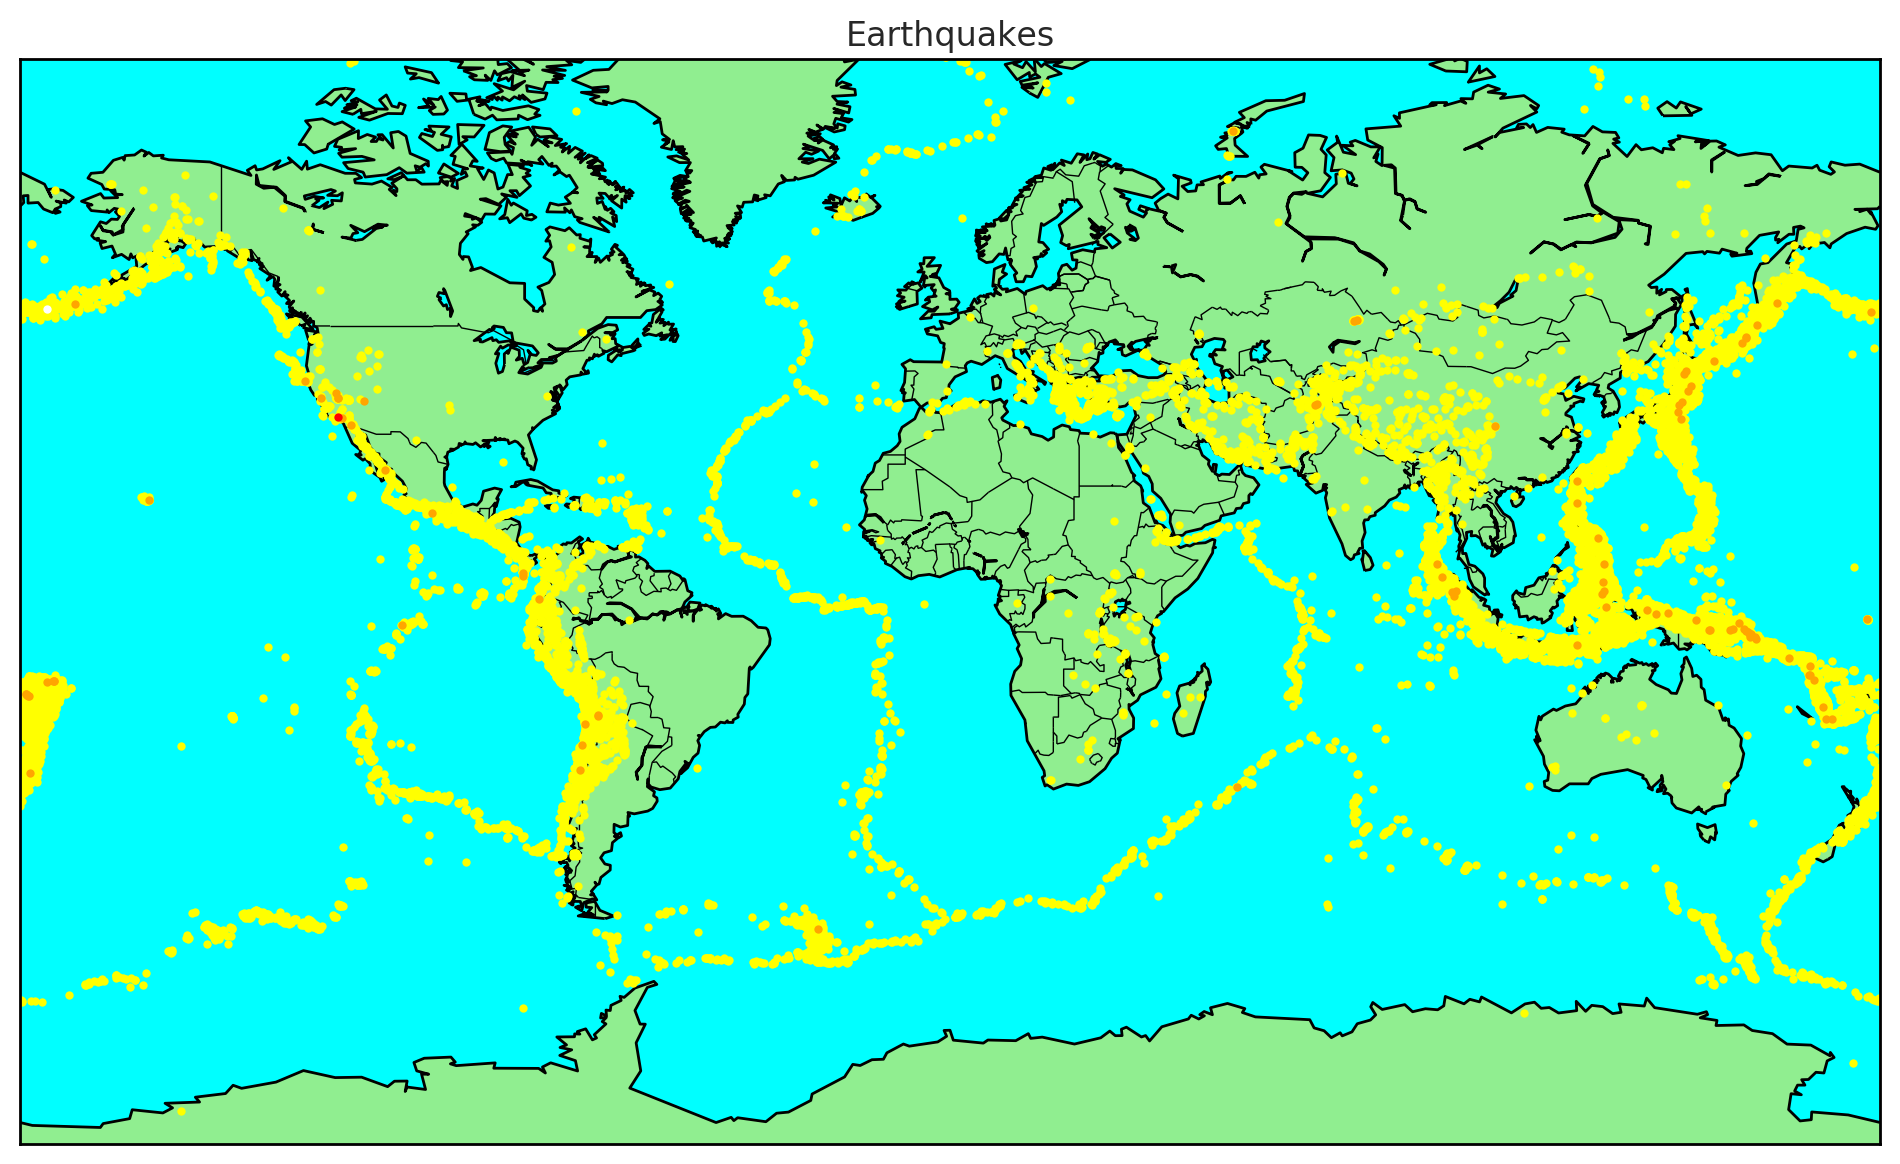

In [28]:
m = Basemap(projection='mill',llcrnrlat=-80,
            urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,
            lat_ts=20,resolution='c')

counts = (grouped['quakes']).tolist()
most = max(counts)

plt.figure(figsize=(12,10))
plt.title("Earthquakes")
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
m.drawcountries()

# Color-code from 1 --> 4 earthquakes in same area w/in 2 decimal places
colors = ['none', 'yellow', 'orange', 'red', 'white']

# TODO:
# Instead of plotting everything with the same color -- compute subsets
# of data with 1, 2, .., 4 different quakes, and plot with colors from
# the colors list above
longitudes = (grouped['near_lon'] / 100).tolist()
latitudes = (grouped['near_lat'] / 100).tolist()
# m.plot(x, y, "o", markersize = 3, color = 'y')

for col in range(most + 1):
    lon = []
    lat = []
    for i in range(len(counts)):
        if counts[i] == col:
            lon.append(longitudes[i])
            lat.append(latitudes[i])
    x, y = m(lon, lat)
    m.plot(x, y, "o", markersize = 3, color = colors[col])

# plt.show()

# Step 2.3 Find Locations with Multiple Quakes in a Month

In [30]:
# TODO:
# compute DataFrame month_apart with pairs of earthquakes
# in the same (to 2 decimal places) location, which occur
# within a month of each other

import datetime
import time
from datetime import date
from dateutil.relativedelta import relativedelta
import dateutil.parser

quake_join = quake_df.merge(quake_df, on=['near_lat', 'near_lon']).drop_duplicates()
new_quake_join = quake_join.query('Date_x != Date_y').drop_duplicates(['near_lon','near_lat'])
new_quake_join = new_quake_join[new_quake_join['Type_x'] == 'Earthquake']
new_quake_join = new_quake_join[new_quake_join['Type_y'] == 'Earthquake']
new_quake_join['add_onemonth'] = pd.DataFrame([t.to_datetime() + relativedelta(months = 1) for t in quake_join['Date_x']])
month_apart = new_quake_join.query('Date_y < add_onemonth')

month_apart.head()

,Date_x,Latitude_x,Longitude_x,Magnitude_x,Depth_x,Type_x,near_lat,near_lon,Date_y,Latitude_y,Longitude_y,Magnitude_y,Depth_y,Type_y,add_onemonth
7289,1984-09-18,34.006,141.500,6.8,47.6,Earthquake,3400,14150,1984-09-21,34.003,141.507,5.7,40.2,Earthquake,1984-10-19
7878,1985-11-17,-1.639,134.911,7.1,10.0,Earthquake,-163,13491,1985-12-06,-1.636,134.910,6.0,24.5,Earthquake,1985-12-18
12768,1995-07-30,-23.230,-70.676,5.8,33.0,Earthquake,-2323,-7067,1995-08-02,-23.230,-70.677,6.0,33.0,Earthquake,1995-09-03
15557,2001-04-01,-34.409,55.464,5.5,10.0,Earthquake,-3440,5546,2001-04-04,-34.405,55.464,5.5,10.0,Earthquake,2001-05-13
16792,2003-12-25,-22.305,169.531,6.0,10.0,Earthquake,-2230,16953,2004-01-03,-22.300,169.535,5.5,10.0,Earthquake,2004-01-28


# Step 2.3 Plot Multiple Quakes over Prior Map

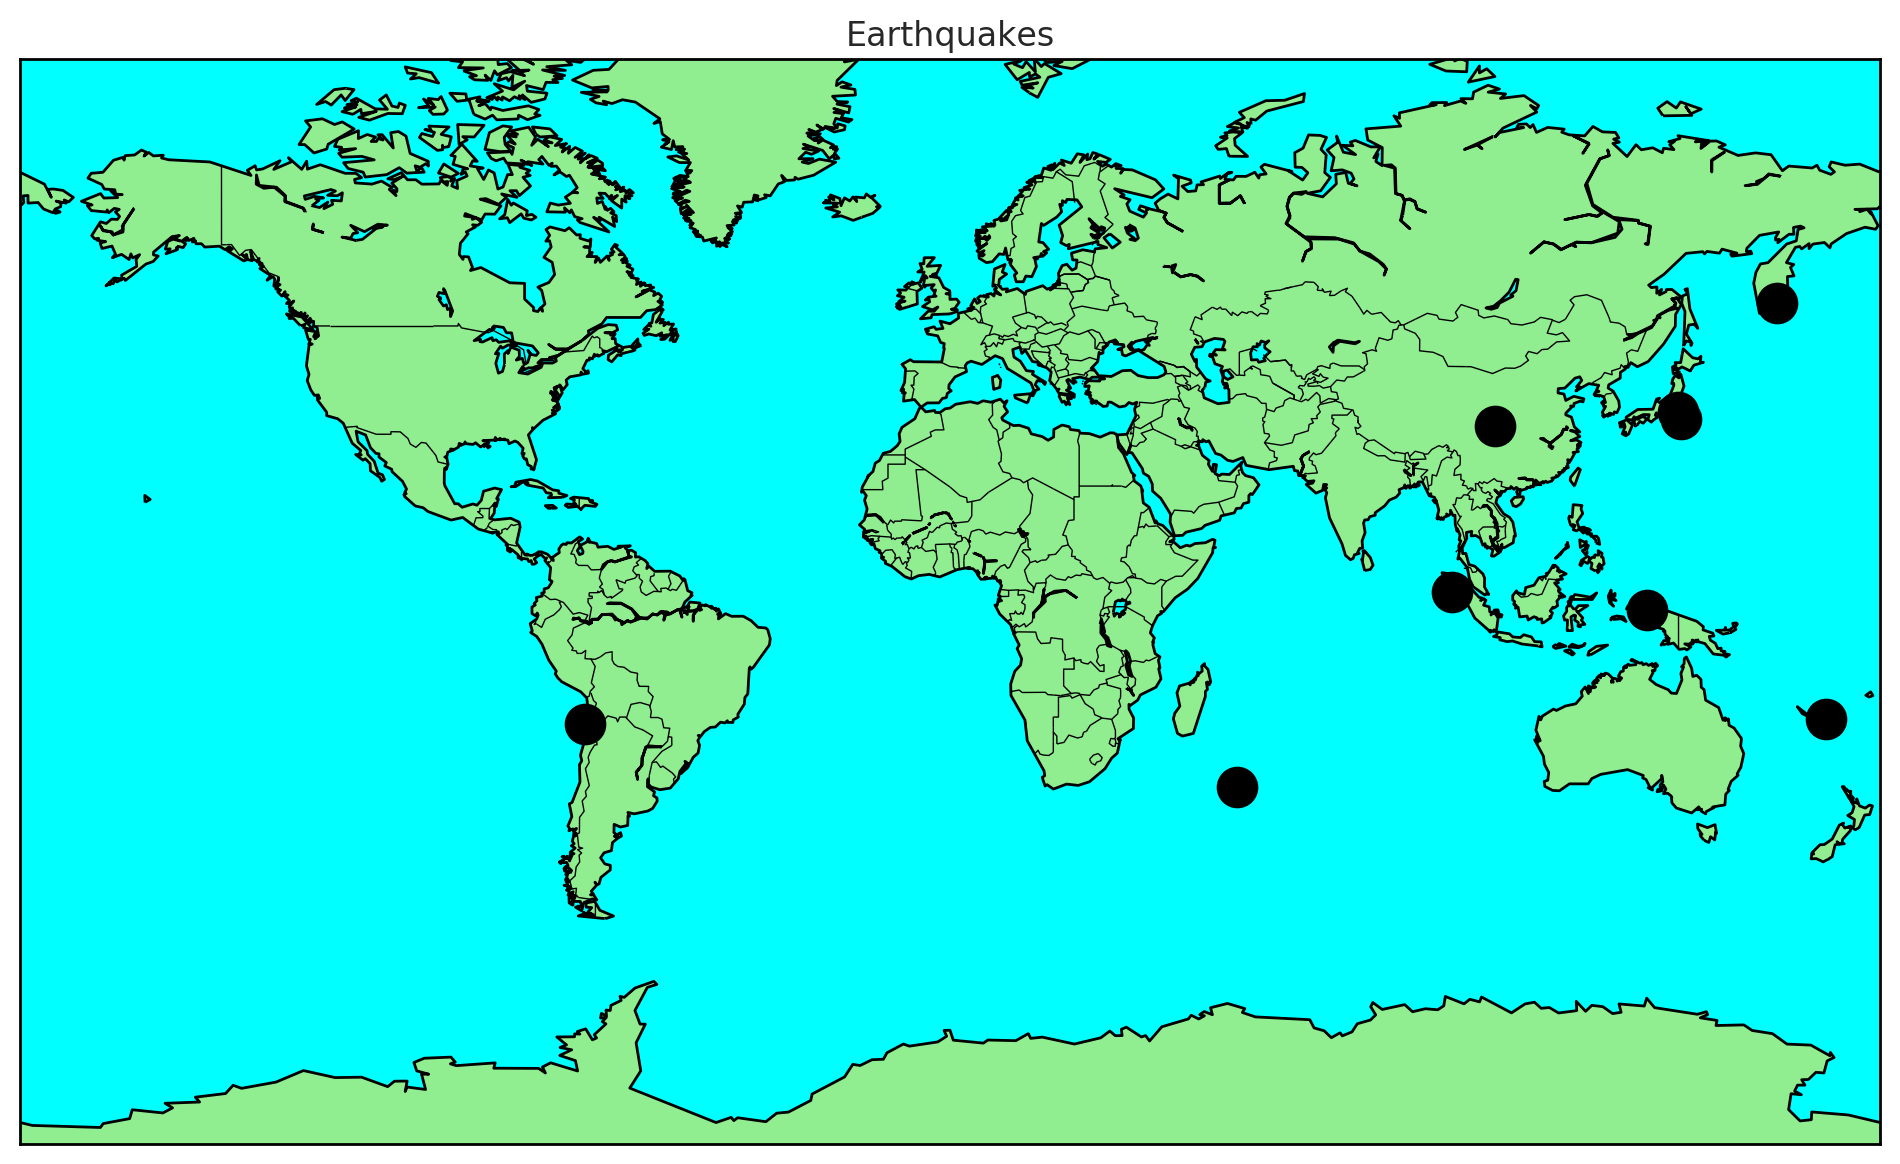

In [33]:
# TODO: reproduce plot from 2.2.
# Overlay points from month_apart
# Use "o", markersize = 15, color = 'black'
m = Basemap(projection='mill',llcrnrlat=-80,
            urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,
            lat_ts=20,resolution='c')

counts = (grouped['quakes']).tolist()
most = max(counts)

plt.figure(figsize=(12,10))
plt.title("Earthquakes")
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
m.drawcountries()

# Color-code from 1 --> 4 earthquakes in same area w/in 2 decimal places
colors = ['none', 'yellow', 'orange', 'red', 'white']

# TODO:
# Instead of plotting everything with the same color -- compute subsets
# of data with 1, 2, .., 4 different quakes, and plot with colors from
# the colors list above

new_longitudes = (month_apart['near_lon'] / 100).tolist()
new_latitudes = (month_apart['near_lat'] / 100).tolist()

xx, yy = m(new_longitudes, new_latitudes)
m.plot(xx, yy, "o", markersize = 15, color = 'black')
# plt.show()
